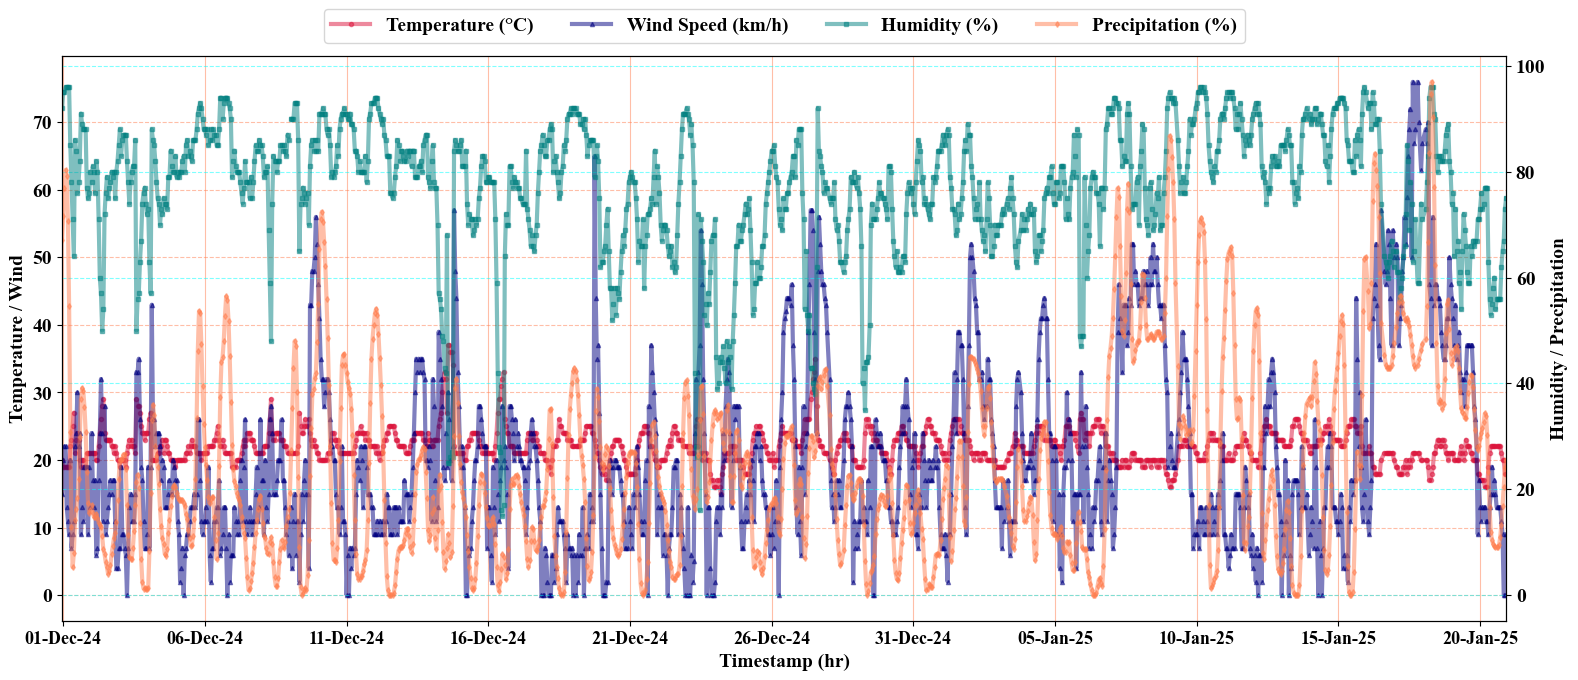

               Timestamp  Temperature_C  Wind_km_h  Humidity_%  \
0    2024-12-01 00:00:00           20.0       15.0        92.0   
1    2024-12-01 01:00:00           19.0       20.0        95.0   
2    2024-12-01 02:00:00           19.0       22.0        95.0   
3    2024-12-01 03:00:00           19.0       22.0        96.0   
4    2024-12-01 04:00:00           19.0       13.0        96.0   
...                  ...            ...        ...         ...   
1205 2025-01-20 19:00:00           21.0       11.0        62.0   
1206 2025-01-20 20:00:00           20.0        9.0        65.0   
1207 2025-01-20 21:00:00           20.0        0.0        67.0   
1208 2025-01-20 22:00:00           18.0        0.0        73.0   
1209 2025-01-20 23:00:00           18.0        9.0        75.0   

      Precipitation_%  
0               67.09  
1               71.61  
2               77.00  
3               80.34  
4               79.11  
...               ...  
1205            13.33  
1206           

,Timestamp,Temperature_C,Wind_km_h,Humidity_%,Precipitation_%
count,1210,1209.000000,1209.000000,1209.000000,1210.000000
mean,2024-12-26 07:00:35.702479360,22.011580,20.103391,76.727874,24.442504
min,2024-12-01 00:00:00,15.000000,0.000000,15.000000,0.000000
25%,2024-12-13 14:15:00,20.000000,11.000000,71.000000,10.247500
50%,2024-12-26 04:30:00,22.000000,17.000000,79.000000,20.000000
75%,2025-01-07 22:45:00,23.000000,26.000000,86.000000,35.220000
max,2025-01-20 23:00:00,37.000000,76.000000,96.000000,97.000000
std,NaN,2.539072,13.720123,12.744869,18.265622


In [216]:
# -----------------------------------------------------------------------------
# Step 1: Load raw weather data
# -----------------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set font globally
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14
plt.rcParams["font.weight"] = "bold"

# Load the processed dataset with parsed timestamps
file_path = "Data/Exp/ProcessedData_Meteorological_Wollongong_01Dec24_to_20Jan25.csv"
df = pd.read_csv(file_path, parse_dates=['Timestamp'])

# Create the plot
fig, ax1 = plt.subplots(figsize=(16, 7))

# Plot temperature, wind speed
ax1.plot(
    df['Timestamp'],
    df['Temperature_C'],
    label='Temperature (°C)',
    color='crimson',
    linewidth=3,
    marker='o',
    markersize=3,
    alpha=0.5
)
ax1.plot(
    df['Timestamp'],
    df['Wind_km_h'],
    label='Wind Speed (km/h)',
    color='navy',
    linewidth=3,
    marker='^',
    markersize=3,
    alpha=0.5
)

# Plot humidity and precipitation on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(
    df['Timestamp'],
    df['Humidity_%'],
    label='Humidity (%)',
    color='teal',
    linewidth=3,
    marker='s',
    markersize=3,
    alpha=0.5
)
ax2.plot(
    df['Timestamp'],
    df['Precipitation_%'],
    label='Precipitation (%)',
    color='coral',
    linewidth=3,
    marker='d',
    markersize=3,
    alpha=0.5
)

# Axis labels
ax1.set_xlabel('Timestamp (hr)', fontweight='bold')
ax1.set_ylabel('Temperature / Wind', fontweight='bold')
ax2.set_ylabel('Humidity / Precipitation', fontweight='bold')

# 1. Major ticks at 12:00 each day (so "10 Jan 2025" appears at midday)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=24*5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))

# 2. Minor ticks = every 6 hours
ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=24*10))

# 3. Vertical grid lines at every 6h (minor ticks)
ax1.grid(which='minor', linestyle='--', color='coral', alpha=0.5)

# 3a. Horizontal grid lines at each y‐major tick
ax1.grid(which='major', axis='y', linestyle='--', color='coral', alpha=0.5)

ax2.grid(which='major', axis='y', linestyle='--', color='cyan', alpha=0.5)

# 4. Ensure no grid at x‐major ticks
ax1.grid(which='major', axis='x', color='coral', alpha=0.5, visible=True)

# 5. Fix x‐axis range: 
start = pd.Timestamp("2024-12-01 00:00")
end   = pd.Timestamp("2025-01-20 23:00")
ax1.set_xlim(start, end)

# 6. Keep x‐axis labels horizontal & set font size
ax1.tick_params(axis='x', rotation=0, labelsize=13)

# # Remove or comment out this line so labels stay horizontal:
# fig.autofmt_xdate()

# # Shade 15–19 Jan as severe weather
# ax1.axvspan(
#     pd.Timestamp("2025-01-15 14:20"),
#     pd.Timestamp("2025-01-18 22:59"),
#     color='salmon',
#     alpha=0.3,
#     label='Severe Weather Period'
# )

# Merge legends from both axes + shaded patch
lines, labels   = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines + lines2,
    labels + labels2,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    ncol=4,
    frameon=True
)

plt.tight_layout()
# plt.savefig(
#     "Figures/Wollongong_Weather_10_20_Jan_2025.png",
#     dpi=600,
#     bbox_inches='tight'
# )
plt.show()


print(df)
df.describe()

In [218]:
### Check whether any 'NaN' or '0' value exists
get_Null = df.isnull().sum()

if get_Null.sum(axis=0).any():   # cleaner check for any nulls
    # Use forward fill instead of interpolate with method='ffill'
    df.ffill(inplace=True)
    print("NaN values found!!")  
    print(get_Null)
    print("====Fixing====")
    print(df.isnull().sum())
    print("NaN values are gone!!")
else:
    print("Did not find any Null/NaN values")

NaN values found!!
Timestamp          0
Temperature_C      1
Wind_km_h          1
Humidity_%         1
Precipitation_%    0
dtype: int64
====Fixing====
Timestamp          0
Temperature_C      0
Wind_km_h          0
Humidity_%         0
Precipitation_%    0
dtype: int64
NaN values are gone!!


In [3]:
# Create a copy of the input DataFrame
df_x = df.copy()
# Convert the 'Timestamp' column to a datetime data type
df_x['Timestamp'] = pd.to_datetime(df_x['Timestamp'])
# Set the 'timestamp' column as the index of the DataFrame
df_x.set_index('Timestamp', inplace=True)
# Resample to 3-hour intervals (mean to smooth hourly data)
df_x = df_x.resample("3h").mean()

df_x

,Temperature_C,Wind_km_h,Humidity_%,Precipitation_%
Timestamp,,,,
2024-12-01 00:00:00,19.333333,19.000000,94.000000,71.900000
2024-12-01 03:00:00,19.000000,15.333333,96.000000,76.743333
2024-12-01 06:00:00,21.333333,12.000000,86.333333,32.780000
2024-12-01 09:00:00,24.333333,14.000000,73.666667,9.073333
2024-12-01 12:00:00,23.333333,25.333333,79.333333,18.850000
...,...,...,...,...
2025-01-20 09:00:00,21.666667,15.666667,54.666667,13.000000
2025-01-20 12:00:00,22.000000,15.666667,57.333333,9.333333
2025-01-20 15:00:00,22.000000,13.000000,56.000000,9.146667


In [4]:
### Check whether any 'NaN' or '0' value exists
get_Null = df_x.isnull().sum()

if get_Null.sum(axis=0).any():   # cleaner check for any nulls
    # Use forward fill instead of interpolate with method='ffill'
    df_x.ffill(inplace=True)
    print("NaN values found!!")  
    print(get_Null)
    print("====Fixing====")
    print(df_x.isnull().sum())
    print("NaN values are gone!!")
else:
    print("Did not find any Null/NaN values")

Did not find any Null/NaN values


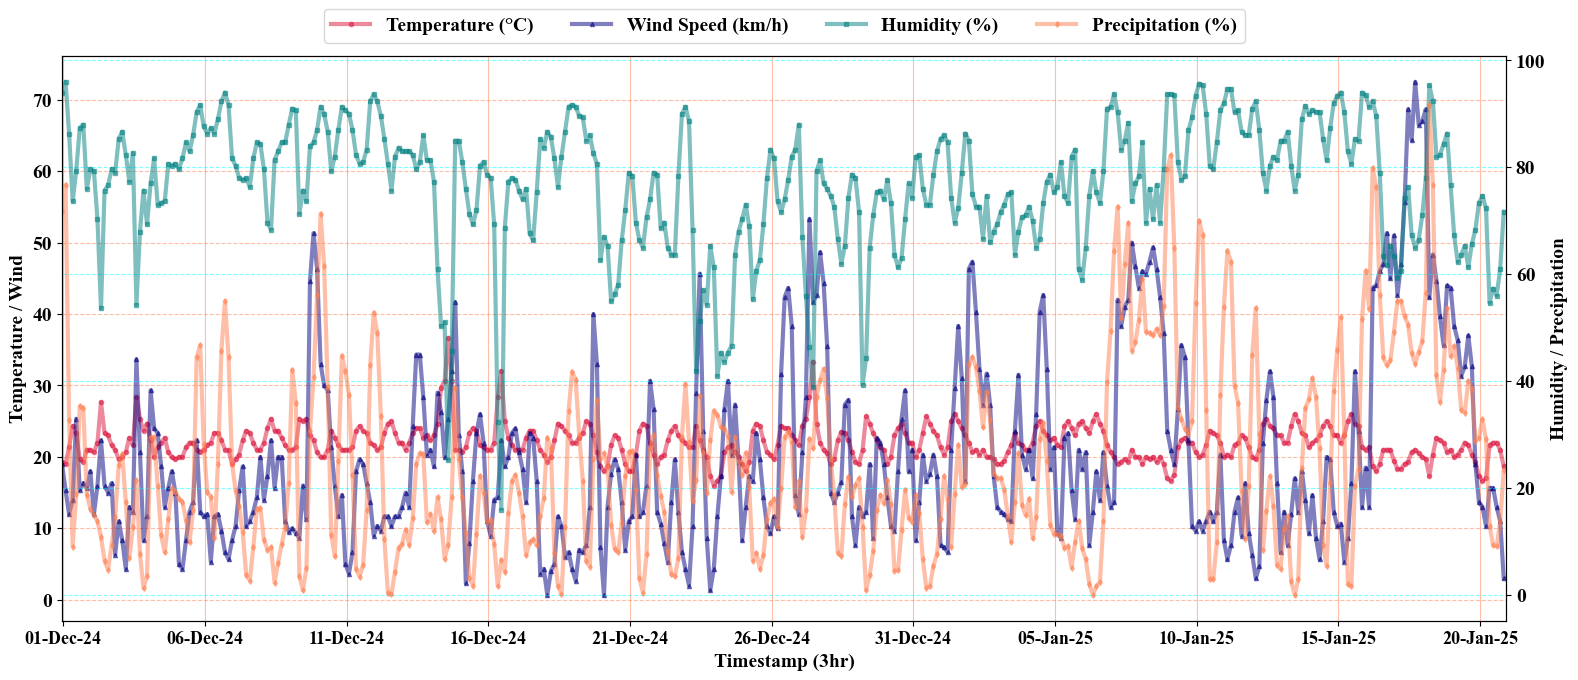

              Timestamp  Temperature_C  Wind_km_h  Humidity_%  Precipitation_%
0   2024-12-01 00:00:00      19.333333  19.000000   94.000000        71.900000
1   2024-12-01 03:00:00      19.000000  15.333333   96.000000        76.743333
2   2024-12-01 06:00:00      21.333333  12.000000   86.333333        32.780000
3   2024-12-01 09:00:00      24.333333  14.000000   73.666667         9.073333
4   2024-12-01 12:00:00      23.333333  25.333333   79.333333        18.850000
..                  ...            ...        ...         ...              ...
403 2025-01-20 09:00:00      21.666667  15.666667   54.666667        13.000000
404 2025-01-20 12:00:00      22.000000  15.666667   57.333333         9.333333
405 2025-01-20 15:00:00      22.000000  13.000000   56.000000         9.146667
406 2025-01-20 18:00:00      21.000000  11.000000   61.000000        13.703333
407 2025-01-20 21:00:00      18.666667   3.000000   71.666667        23.313333

[408 rows x 5 columns]


,Timestamp,Temperature_C,Wind_km_h,Humidity_%,Precipitation_%
count,408,408.000000,408.000000,408.000000,408.000000
mean,2024-12-26 10:29:59.999999744,21.994281,20.325572,76.706699,24.640286
min,2024-12-01 00:00:00,16.000000,0.666667,16.000000,0.000000
25%,2024-12-13 17:15:00,20.625000,11.250000,70.333333,10.474167
50%,2024-12-26 10:30:00,21.833333,16.333333,78.500000,20.000000
75%,2025-01-08 03:45:00,23.333333,26.083333,85.000000,35.462500
max,2025-01-20 21:00:00,36.666667,72.500000,96.000000,91.743333
std,NaN,2.417031,13.354810,12.086758,17.998744


In [5]:
# Create a copy of the input DataFrame
df_plot = df_x.copy()

# Reset the index of the resampled DataFrame
df_plot = df_plot.reset_index()

# Convert the 'Timestamp' column back to a datetime data type
df_plot['Timestamp'] = pd.to_datetime(df_plot['Timestamp'])

# Create the plot
fig, ax1 = plt.subplots(figsize=(16, 7))

# Plot temperature, wind speed
ax1.plot(
    df_plot['Timestamp'],
    df_plot['Temperature_C'],
    label='Temperature (°C)',
    color='crimson',
    linewidth=3,
    marker='o',
    markersize=3,
    alpha=0.5
)
ax1.plot(
    df_plot['Timestamp'],
    df_plot['Wind_km_h'],
    label='Wind Speed (km/h)',
    color='navy',
    linewidth=3,
    marker='^',
    markersize=3,
    alpha=0.5
)

# Plot humidity and precipitation on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(
    df_plot['Timestamp'],
    df_plot['Humidity_%'],
    label='Humidity (%)',
    color='teal',
    linewidth=3,
    marker='s',
    markersize=3,
    alpha=0.5
)
ax2.plot(
    df_plot['Timestamp'],
    df_plot['Precipitation_%'],
    label='Precipitation (%)',
    color='coral',
    linewidth=3,
    marker='d',
    markersize=3,
    alpha=0.5
)

# Axis labels
ax1.set_xlabel('Timestamp (3hr)', fontweight='bold')
ax1.set_ylabel('Temperature / Wind', fontweight='bold')
ax2.set_ylabel('Humidity / Precipitation', fontweight='bold')

# 1. Major ticks at 12:00 each day (so "10 Jan 2025" appears at midday)
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=24*5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))

# 2. Minor ticks = every 6 hours
ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=24*10))

# 3. Vertical grid lines at every 6h (minor ticks)
ax1.grid(which='minor', linestyle='--', color='coral', alpha=0.5)

# 3a. Horizontal grid lines at each y‐major tick
ax1.grid(which='major', axis='y', linestyle='--', color='coral', alpha=0.5)

ax2.grid(which='major', axis='y', linestyle='--', color='cyan', alpha=0.5)

# 4. Ensure no grid at x‐major ticks
ax1.grid(which='major', axis='x', color='coral', alpha=0.5, visible=True)

# 5. Fix x‐axis range: 
start = pd.Timestamp("2024-12-01 00:00")
end   = pd.Timestamp("2025-01-20 23:00")
ax1.set_xlim(start, end)

# 6. Keep x‐axis labels horizontal & set font size
ax1.tick_params(axis='x', rotation=0, labelsize=13)

# # Remove or comment out this line so labels stay horizontal:
# fig.autofmt_xdate()

# # Shade 15–19 Jan as severe weather
# ax1.axvspan(
#     pd.Timestamp("2025-01-15 14:20"),
#     pd.Timestamp("2025-01-18 22:59"),
#     color='salmon',
#     alpha=0.3,
#     label='Severe Weather Period'
# )

# Merge legends from both axes + shaded patch
lines, labels   = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines + lines2,
    labels + labels2,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    ncol=4,
    frameon=True
)

plt.tight_layout()
# plt.savefig(
#     "Figures/Wollongong_Weather_10_20_Jan_2025.png",
#     dpi=600,
#     bbox_inches='tight'
# )
plt.show()


print(df_plot)
df_plot.describe()

In [6]:
from pathlib import Path
import pickle
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 1) Fit scaler on df_x and transform
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_x.values),
    index=df_x.index,
    columns=df_x.columns
)

# 2) Save the fitted scaler
model_dir = Path("Model")
model_dir.mkdir(parents=True, exist_ok=True)
scaler_path = model_dir / "scaleWeatherData.pkl"   # e.g., Model\scaleWeatherData.pkl
with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)

print("Scaled DataFrame shape:", df_scaled.shape)
print("Scaler saved to:", scaler_path)


with open("Model/scaleWeatherData.pkl", "rb") as f:
    scaler = pickle.load(f)


# Load later and inverse-transform (if needed):
# inverse: original_df = pd.DataFrame(scaler.inverse_transform(df_scaled), df_scaled.index, df_scaled.columns)

Scaled DataFrame shape: (408, 4)
Scaler saved to: Model\scaleWeatherData.pkl


In [7]:
df_scaled

,Temperature_C,Wind_km_h,Humidity_%,Precipitation_%
Timestamp,,,,
2024-12-01 00:00:00,0.161290,0.255220,0.975000,0.783708
2024-12-01 03:00:00,0.145161,0.204176,1.000000,0.836500
2024-12-01 06:00:00,0.258065,0.157773,0.879167,0.357301
2024-12-01 09:00:00,0.403226,0.185615,0.720833,0.098899
2024-12-01 12:00:00,0.354839,0.343387,0.791667,0.205465
...,...,...,...,...
2025-01-20 09:00:00,0.274194,0.208817,0.483333,0.141700
2025-01-20 12:00:00,0.290323,0.208817,0.516667,0.101733
2025-01-20 15:00:00,0.290323,0.171694,0.500000,0.099698


In [142]:
import numpy as np

IN_LEN  = 14 * 8   # input window length
OUT_LEN =  3 * 8   # forecast horizon
OBS_LEN =  3 * 8   # observation buffer

def make_windows_1d(series, in_len=IN_LEN, out_len=OUT_LEN, obs_len=OBS_LEN):
    """
    series: 1D numpy array (scaled)
    returns:
      X: [N, in_len, 1]
      y: [N, out_len]
      limited so that at least obs_len points remain after the last output
    """
    # effective usable length excludes the trailing buffer
    usable_len = len(series) - (in_len + out_len + obs_len) + in_len + out_len + obs_len
    N = usable_len - (in_len + out_len) + 1
    if N <= 0:
        raise ValueError(
            f"Need at least {in_len+out_len+obs_len} points; have {len(series)}."
        )
    
    X = np.empty((N, in_len, 1), dtype=np.float32)
    Y = np.empty((N, out_len),  dtype=np.float32)
    for i in range(N):
        X[i, :, 0] = series[i : i + in_len]
        Y[i, :]    = series[i + in_len : i + in_len + out_len]
    return X, Y

# --- Build windows per variable from df_scaled ---
datasets = {}
for col in df_scaled.columns:
    s = df_scaled[col].to_numpy(dtype=float)
    X, y = make_windows_1d(s, IN_LEN, OUT_LEN, OBS_LEN)
    datasets[col] = {"X": X, "y": y}
    print(f"{col}: X{X.shape}, y{y.shape}")


Temperature_C: X(273, 112, 1), y(273, 24)
Wind_km_h: X(273, 112, 1), y(273, 24)
Humidity_%: X(273, 112, 1), y(273, 24)
Precipitation_%: X(273, 112, 1), y(273, 24)


In [143]:
# Example access:
X_temp = datasets["Temperature_C"]["X"]   # shape [N, 114, 1]
y_temp = datasets["Temperature_C"]["y"]   # shape [N, 24]
print("X_temp.shape:", X_temp.shape)
print("y_temp.shape:", y_temp.shape)

X_temp.shape: (273, 112, 1)
y_temp.shape: (273, 24)


In [144]:
X_temp[len(X_temp)-1].shape

(112, 1)

In [145]:
y_temp[len(y_temp)-1]

array([0.19354838, 0.17741935, 0.06451613, 0.20967741, 0.32258064,
       0.30645162, 0.29032257, 0.22580644, 0.24193548, 0.19354838,
       0.20967741, 0.24193548, 0.29032257, 0.27419356, 0.20967741,
       0.16129032, 0.06451613, 0.03225806, 0.0483871 , 0.27419356,
       0.29032257, 0.29032257, 0.24193548, 0.12903225], dtype=float32)

In [146]:
last_idx = len(y_temp) - 1   # last window index
end_pos  = last_idx + IN_LEN + OUT_LEN - 1
last_ts  = df_scaled.index[end_pos]   # timestamp in original df_x index
print("Last target timestamp:", last_ts)

Last target timestamp: 2025-01-20 21:00:00


In [147]:
X.shape[1]

112

In [148]:
y.shape[1]

24

In [149]:
X.shape[2]

1

In [150]:
# ===========================================================
# Part 1: Define MSDL (Multilayer Stacked Deep Learning) Model
# ===========================================================

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from pathlib import Path
import gc

def build_MSDL(input_len=112, out_len=24, n_features=1):
    """
    Build a Multilayer Stacked Deep Learning (MSDL) model for
    multi-step time series forecasting.

    Parameters
    ----------
    input_len : int
        Number of past time steps (look-back window) used as input.
    out_len : int
        Number of future time steps to forecast.
    n_features : int
        Number of features per time step (e.g., 1 for univariate data).

    Returns
    -------
    model : tf.keras.Model
        Compiled Keras model ready for training.
    """

    model = models.Sequential([

        # Input layer expects sequences of length = input_len, with n_features each
        layers.Input(shape=(input_len, n_features)),

        # First LSTM layer (returns full sequence to allow stacking)
        layers.LSTM(128, return_sequences=True),

        # Second LSTM layer (returns only the last hidden state)
        layers.LSTM(64, return_sequences=False),

        # Dense hidden layer for learning non-linear combinations of features
        layers.Dense(128, activation="relu"),

        # Dropout layer for regularization (prevents overfitting)
        layers.Dropout(0.2),

        # Final output layer → produces out_len forecast steps
        layers.Dense(out_len)
    ])

    # Compile the model with optimizer and loss function
    model.compile(
        optimizer="adam",         # adaptive learning rate optimizer
        loss="mse",               # mean squared error for regression
        metrics=["mae"]           # mean absolute error as additional metric
    )

    return model


# ===============================
# Example: Build and summarize model
# ===============================
model = build_MSDL(input_len=112, out_len=24, n_features=1)

# Print architecture summary (layers, output shapes, parameters)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 112, 128)          66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 24)                3096      
                                                                 
Total params: 127,384
Trainable params: 127,384
Non-trainable params: 0
_________________________________________________________________


In [151]:
# ===========================================================
# Part 2.A: Train & Save MSDL Model for Temperature Forecasting
# ===========================================================

# --- Prepare training data (pre-windowed) ---
X = datasets["Temperature_C"]["X"]   # shape = [N, 112, 1], input sequences
y = datasets["Temperature_C"]["y"]   # shape = [N, 24],     forecast targets

# --- 4× replication (no augmentation) ---
X = np.concatenate([X, X, X, X], axis=0)
y = np.concatenate([y, y, y, y], axis=0)

# (recommended) shuffle to avoid repeated blocks in order
idx = np.random.permutation(len(X))
X, y = X[idx], y[idx]

# --- Reproducibility (optional) ---
np.random.seed(42)
tf.random.set_seed(42)

# --- HARD RESET: clear any existing graph/weights, free memory ---
tf.keras.backend.clear_session()
try:
    del model
except NameError:
    pass
gc.collect()

# --- Fresh model ---
model = build_MSDL(input_len=X.shape[1], out_len=y.shape[1], n_features=X.shape[2])

# --- Define output directory and model save path ---
out_dir = Path("Model")
out_dir.mkdir(parents=True, exist_ok=True)
model_path = out_dir / "predictiveAnalysisWeather_T.h5"

# --- Configure callbacks ---
early_stop = EarlyStopping(
    monitor="val_loss",          # stop monitoring validation loss
    patience=20,                 # wait 20 epochs with no improvement
    restore_best_weights=True    # roll back to best weights at the end
)

checkpoint = ModelCheckpoint(
    filepath=model_path,         # save path for the best model
    monitor="val_loss",          # criterion for saving
    save_best_only=True,         # overwrite only if val_loss improves
    verbose=1                    # print when model is saved
)

# --- Train the MSDL model ---
history = model.fit(
    X, y,
    epochs=500,                  # maximum epochs (may stop earlier due to EarlyStopping)
    batch_size=16,               # mini-batch size
    validation_split=0.1,        # 10% of data for validation
    verbose=1,                   # print training progress
    callbacks=[early_stop, checkpoint]
)

# --- Save the final (best) model explicitly ---
model.save(model_path)
print(f"✅ MSDL model for Temperature saved to: {model_path}")

Epoch 1/500
62/62 [==============================] - ETA: 0s - loss: 0.0267 - mae: 0.1272
Epoch 1: val_loss improved from inf to 0.01241, saving model to Model\predictiveAnalysisWeather_T.h5
62/62 [==============================] - 2s 20ms/step - loss: 0.0267 - mae: 0.1272 - val_loss: 0.0124 - val_mae: 0.0898
Epoch 2/500
61/62 [============================>.] - ETA: 0s - loss: 0.0156 - mae: 0.0983
Epoch 2: val_loss improved from 0.01241 to 0.01151, saving model to Model\predictiveAnalysisWeather_T.h5
62/62 [==============================] - 1s 13ms/step - loss: 0.0156 - mae: 0.0982 - val_loss: 0.0115 - val_mae: 0.0868
Epoch 3/500
61/62 [============================>.] - ETA: 0s - loss: 0.0146 - mae: 0.0952
Epoch 3: val_loss did not improve from 0.01151
62/62 [==============================] - 1s 12ms/step - loss: 0.0146 - mae: 0.0952 - val_loss: 0.0115 - val_mae: 0.0868
Epoch 4/500
61/62 [============================>.] - ETA: 0s - loss: 0.0140 - mae: 0.0929
Epoch 4: val_loss improved 

In [ ]:
# ===========================================================
# Part 2.B: Train & Save MSDL Model for Humidity Forecasting
# ===========================================================

# --- Prepare training data (pre-windowed) ---
X = datasets["Humidity_%"]["X"]   # shape = [N, 112, 1], input sequences
y = datasets["Humidity_%"]["y"]   # shape = [N, 24],     forecast targets


# --- 4× replication (no augmentation) ---
X = np.concatenate([X, X, X, X], axis=0)
y = np.concatenate([y, y, y, y], axis=0)

# (recommended) shuffle to avoid repeated blocks in order
idx = np.random.permutation(len(X))
X, y = X[idx], y[idx]


# --- Reproducibility (optional) ---
np.random.seed(42)
tf.random.set_seed(42)

# --- HARD RESET: clear any existing graph/weights, free memory ---
tf.keras.backend.clear_session()
try:
    del model
except NameError:
    pass
gc.collect()

# --- Fresh model ---
model = build_MSDL(input_len=X.shape[1], out_len=y.shape[1], n_features=X.shape[2])

# --- Define output directory and model save path ---
out_dir = Path("Model")
out_dir.mkdir(parents=True, exist_ok=True)
model_path = out_dir / "predictiveAnalysisWeather_H.h5"

# --- Configure callbacks ---
early_stop = EarlyStopping(
    monitor="val_loss",          # monitor validation loss
    patience=20,                 # stop if no improvement for 20 epochs
    restore_best_weights=True    # restore weights from best epoch
)

checkpoint = ModelCheckpoint(
    filepath=model_path,         # save path for the best model
    monitor="val_loss",          # criterion for saving
    save_best_only=True,         # overwrite only if val_loss improves
    verbose=1                    # log when model is saved
)


# --- Train the MSDL model ---
history = model.fit(
    X, y,
    epochs=500,                  # maximum epochs (early stop may cut shorter)
    batch_size=16,               # training batch size
    validation_split=0.1,        # reserve 10% of data for validation
    verbose=1,                   # print training progress
    callbacks=[early_stop, checkpoint]
)

# --- Save the final (best) model explicitly ---
model.save(model_path)
print(f"✅ MSDL model for Humidity saved to: {model_path}")


Epoch 1/500
51/51 [==============================] - ETA: 0s - loss: 0.1287 - mae: 0.2754
Epoch 1: val_loss improved from inf to 0.02555, saving model to Model\predictiveAnalysisWeather_H.h5
51/51 [==============================] - 2s 19ms/step - loss: 0.1287 - mae: 0.2754 - val_loss: 0.0256 - val_mae: 0.1267
Epoch 2/500
51/51 [==============================] - ETA: 0s - loss: 0.0420 - mae: 0.1618
Epoch 2: val_loss did not improve from 0.02555
51/51 [==============================] - 1s 12ms/step - loss: 0.0420 - mae: 0.1618 - val_loss: 0.0288 - val_mae: 0.1394
Epoch 3/500
49/51 [===========================>..] - ETA: 0s - loss: 0.0359 - mae: 0.1495
Epoch 3: val_loss improved from 0.02555 to 0.02256, saving model to Model\predictiveAnalysisWeather_H.h5
51/51 [==============================] - 1s 14ms/step - loss: 0.0360 - mae: 0.1495 - val_loss: 0.0226 - val_mae: 0.1129
Epoch 4/500
51/51 [==============================] - ETA: 0s - loss: 0.0329 - mae: 0.1426
Epoch 4: val_loss did not i

In [ ]:
# ===========================================================
# Part 2.C: Train & Save MSDL Model for Wind Forecasting
# ===========================================================

# --- Prepare training data (pre-windowed) ---
X = datasets["Wind_km_h"]["X"]   # shape = [N, 112, 1], input sequences
y = datasets["Wind_km_h"]["y"]   # shape = [N, 24],     forecast targets

# --- 4× replication (no augmentation) ---
X = np.concatenate([X, X, X, X], axis=0)
y = np.concatenate([y, y, y, y], axis=0)

# (recommended) shuffle to avoid repeated blocks in order
idx = np.random.permutation(len(X))
X, y = X[idx], y[idx]

# --- Reproducibility (optional) ---
np.random.seed(42)
tf.random.set_seed(42)

# --- HARD RESET: clear any existing graph/weights, free memory ---
tf.keras.backend.clear_session()
try:
    del model
except NameError:
    pass
gc.collect()

# --- Fresh model ---
model = build_MSDL(input_len=X.shape[1], out_len=y.shape[1], n_features=X.shape[2])


# --- Define output directory and model save path ---
out_dir = Path("Model")
out_dir.mkdir(parents=True, exist_ok=True)
model_path = out_dir / "predictiveAnalysisWeather_W.h5"

# --- Configure callbacks ---
early_stop = EarlyStopping(
    monitor="val_loss",          # monitor validation loss
    patience=20,                 # stop if no improvement for 20 epochs
    restore_best_weights=True    # restore weights from best epoch
)

checkpoint = ModelCheckpoint(
    filepath=model_path,         # save path for the best model
    monitor="val_loss",          # criterion for saving
    save_best_only=True,         # overwrite only if val_loss improves
    verbose=1                    # log when model is saved
)


# --- Train the MSDL model ---
history = model.fit(
    X, y,
    epochs=500,                  # maximum epochs (may stop earlier via EarlyStopping)
    batch_size=16,               # training batch size
    validation_split=0.1,        # reserve 10% for validation
    verbose=1,                   # print training progress
    callbacks=[early_stop, checkpoint]
)

# --- Save the final (best) model explicitly ---
model.save(model_path)
print(f"✅ MSDL model for Wind saved to: {model_path}")


Epoch 1/500
47/51 [==========================>...] - ETA: 0s - loss: 0.0436 - mae: 0.1614
Epoch 1: val_loss improved from inf to 0.02780, saving model to Model\predictiveAnalysisWeather_W.h5
51/51 [==============================] - 2s 22ms/step - loss: 0.0429 - mae: 0.1600 - val_loss: 0.0278 - val_mae: 0.1355
Epoch 2/500
51/51 [==============================] - ETA: 0s - loss: 0.0317 - mae: 0.1403
Epoch 2: val_loss improved from 0.02780 to 0.02630, saving model to Model\predictiveAnalysisWeather_W.h5
51/51 [==============================] - 1s 13ms/step - loss: 0.0317 - mae: 0.1403 - val_loss: 0.0263 - val_mae: 0.1261
Epoch 3/500
51/51 [==============================] - ETA: 0s - loss: 0.0304 - mae: 0.1376
Epoch 3: val_loss improved from 0.02630 to 0.02603, saving model to Model\predictiveAnalysisWeather_W.h5
51/51 [==============================] - 1s 14ms/step - loss: 0.0304 - mae: 0.1376 - val_loss: 0.0260 - val_mae: 0.1291
Epoch 4/500
51/51 [==============================] - ETA: 0

In [ ]:
# ===========================================================
# Part 2.D: Train & Save MSDL Model for Precipitation Forecasting
# ===========================================================

# --- Prepare training data (pre-windowed) ---
X = datasets["Precipitation_%"]["X"]   # shape = [N, 112, 1], input sequences
y = datasets["Precipitation_%"]["y"]   # shape = [N, 24],     forecast targets

# --- 4× replication (no augmentation) ---
X = np.concatenate([X, X, X, X], axis=0)
y = np.concatenate([y, y, y, y], axis=0)

# (recommended) shuffle to avoid repeated blocks in order
idx = np.random.permutation(len(X))
X, y = X[idx], y[idx]

# --- Reproducibility (optional) ---
np.random.seed(42)
tf.random.set_seed(42)

# --- HARD RESET: clear any existing graph/weights, free memory ---
tf.keras.backend.clear_session()
try:
    del model
except NameError:
    pass
gc.collect()

# --- Build a fresh MSDL model for Precipitation ---
model = build_MSDL(input_len=X.shape[1], out_len=y.shape[1], n_features=X.shape[2])


# --- Define output directory and model save path ---
out_dir = Path("Model")
out_dir.mkdir(parents=True, exist_ok=True)
model_path = out_dir / "predictiveAnalysisWeather_P.h5"

# --- Configure callbacks ---
early_stop = EarlyStopping(
    monitor="val_loss",          # monitor validation loss
    patience=20,                 # stop if no improvement for 20 epochs
    restore_best_weights=True    # restore weights from best epoch
)

checkpoint = ModelCheckpoint(
    filepath=model_path,         # save path for the best model
    monitor="val_loss",          # criterion for saving
    save_best_only=True,         # overwrite only if val_loss improves
    verbose=1                    # log when model is saved
)


# --- Train the MSDL model ---
history = model.fit(
    X, y,
    epochs=500,                  # maximum epochs (may stop earlier via EarlyStopping)
    batch_size=16,               # training batch size
    validation_split=0.1,        # reserve 10% for validation
    verbose=1,                   # print training progress
    callbacks=[early_stop, checkpoint]
)

# --- Save the final (best) model explicitly ---
model.save(model_path)
print(f"✅ MSDL model for Precipitation saved to: {model_path}")


Epoch 1/500
49/51 [===========================>..] - ETA: 0s - loss: 0.0489 - mae: 0.1682
Epoch 1: val_loss improved from inf to 0.03042, saving model to Model\predictiveAnalysisWeather_P.h5
51/51 [==============================] - 2s 22ms/step - loss: 0.0488 - mae: 0.1683 - val_loss: 0.0304 - val_mae: 0.1376
Epoch 2/500
51/51 [==============================] - ETA: 0s - loss: 0.0370 - mae: 0.1478
Epoch 2: val_loss did not improve from 0.03042
51/51 [==============================] - 1s 12ms/step - loss: 0.0370 - mae: 0.1478 - val_loss: 0.0308 - val_mae: 0.1419
Epoch 3/500
51/51 [==============================] - ETA: 0s - loss: 0.0350 - mae: 0.1448
Epoch 3: val_loss improved from 0.03042 to 0.02854, saving model to Model\predictiveAnalysisWeather_P.h5
51/51 [==============================] - 1s 13ms/step - loss: 0.0350 - mae: 0.1448 - val_loss: 0.0285 - val_mae: 0.1303
Epoch 4/500
51/51 [==============================] - ETA: 0s - loss: 0.0333 - mae: 0.1414
Epoch 4: val_loss improved 

In [170]:
print("Last target timestamp:", last_ts)

Last target timestamp: 2025-01-20 21:00:00


In [172]:
import numpy as np

# --- Test slice (inclusive from Jan 1, 2025) ---
df_test = df_scaled.loc["2025-01-01":].copy()

df_test

,Temperature_C,Wind_km_h,Humidity_%,Precipitation_%
Timestamp,,,,
2025-01-01 00:00:00,0.258065,0.097448,0.866667,0.155833
2025-01-01 03:00:00,0.209677,0.092807,0.875000,0.242633
2025-01-01 06:00:00,0.258065,0.083527,0.858333,0.196599
2025-01-01 09:00:00,0.435484,0.283063,0.729167,0.098572
2025-01-01 12:00:00,0.483871,0.403712,0.670833,0.206736
...,...,...,...,...
2025-01-20 09:00:00,0.274194,0.208817,0.483333,0.141700
2025-01-20 12:00:00,0.290323,0.208817,0.516667,0.101733
2025-01-20 15:00:00,0.290323,0.171694,0.500000,0.099698


In [173]:
import numpy as np

# --- New function: no tail buffer for test ---
def make_windows_1d_nobuf(series, in_len, out_len):
    """
    Build sliding windows with no observation buffer.
    X: [N, in_len, 1]
    y: [N, out_len]
    """
    n = len(series)
    need = in_len + out_len
    N = n - need + 1
    if N <= 0:
        raise ValueError(f"Need at least {need} points; have {n}.")
    X = np.empty((N, in_len, 1),  dtype=np.float32)
    Y = np.empty((N, out_len),    dtype=np.float32)
    for i in range(N):
        X[i, :, 0] = series[i : i + in_len]
        Y[i, :]    = series[i + in_len : i + in_len + out_len]
    return X, Y

In [174]:
# Given: IN_LEN = 114, OUT_LEN = 24, len(df_test) = 160
test_datasets = {}
for col in df_test.columns:
    s = df_test[col].to_numpy(dtype=float)
    Xt, yt = make_windows_1d_nobuf(s, IN_LEN, OUT_LEN)
    test_datasets[col] = {"X": Xt, "y": yt}
    print(f"{col}: X{Xt.shape}, y{yt.shape}")

Temperature_C: X(25, 112, 1), y(25, 24)
Wind_km_h: X(25, 112, 1), y(25, 24)
Humidity_%: X(25, 112, 1), y(25, 24)
Precipitation_%: X(25, 112, 1), y(25, 24)


In [175]:
# --- Prepare training data (pre-windowed) ---
X = test_datasets["Precipitation_%"]["X"]   # shape = [N, 112, 1], input sequences
y = test_datasets["Precipitation_%"]["y"]   # shape = [N, 24],     forecast targets

In [176]:
X[0][0]

array([0.1558333], dtype=float32)

In [177]:
# IN_LEN = 114; OUT_LEN = 24; len(df_test) = 160
n = len(df_test)

# ---------- FIRST window ----------
first_x_start_ts = df_test.index[0]
first_x_end_ts   = df_test.index[IN_LEN - 1]
print("First X window :", first_x_start_ts, "→", first_x_end_ts)

first_y_start_ts = df_test.index[IN_LEN]
first_y_end_ts   = df_test.index[IN_LEN + OUT_LEN - 1]
print("First y window :", first_y_start_ts, "→", first_y_end_ts)

# ---------- LAST window ----------
i_last = n - (IN_LEN + OUT_LEN)                 # start index of the last X window
last_x_start_ts = df_test.index[i_last]
last_x_end_ts   = df_test.index[i_last + IN_LEN - 1]
print("Last  X window:", last_x_start_ts, "→", last_x_end_ts)

last_y_start_ts = df_test.index[n - OUT_LEN]
last_y_end_ts   = df_test.index[-1]
print("Last  y window:", last_y_start_ts, "→", last_y_end_ts)

First X window : 2025-01-01 00:00:00 → 2025-01-14 21:00:00
First y window : 2025-01-15 00:00:00 → 2025-01-17 21:00:00
Last  X window: 2025-01-04 00:00:00 → 2025-01-17 21:00:00
Last  y window: 2025-01-18 00:00:00 → 2025-01-20 21:00:00


In [178]:
X = test_datasets["Temperature_C"]["X"]   # shape = [N, 112, 1], input sequences
y = test_datasets["Temperature_C"]["y"]   # shape = [N, 24],     forecast targets

In [179]:
p = model_MSDL.predict(X, batch_size=128, verbose=0)         # predicted values: [N,24] (scaled)

In [180]:
y.shape

(25, 24)

In [181]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [182]:
y_flat = y.reshape(-1)
p_flat = p.reshape(-1)
mae_scaled  = mean_absolute_error(y_flat, p_flat)
mse_scaled  = mean_squared_error(y_flat, p_flat)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled   = r2_score(y_flat, p_flat)
print(f"[SCALED] MAE={mae_scaled:.6f}  MSE={mse_scaled:.6f}  RMSE={rmse_scaled:.6f}   R2={r2_scaled:.6f}")

[SCALED] MAE=0.067554  MSE=0.008298  RMSE=0.091092   R2=-0.261605


In [183]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
from pathlib import Path

# Given from your steps:
# X = test_datasets["Temperature_C"]["X"]   # [N, 112, 1]
# y = test_datasets["Temperature_C"]["y"]   # [N, 24]
# p = model_MSDL.predict(X, batch_size=128, verbose=0)  # [N, 24] (scaled)
# df_test = df_scaled.loc["2025-01-01":].copy()  # 3-hourly indexed, includes Temperature_C

# ---------- Build df_t_scaled using y's integer indices ----------
N, IN_LEN = X.shape[0], X.shape[1]   # IN_LEN = 112 here
OUT_LEN   = y.shape[1]               # 24
T         = len(df_test)

# Absolute indices for each (i, h): abs_idx[i, h] = i + IN_LEN + h
abs_idx = (np.arange(N)[:, None] + IN_LEN) + np.arange(OUT_LEN)[None, :]
mask    = abs_idx < T                        # guard tail if needed

# Flatten with mask
ts_array = df_test.index.values[abs_idx[mask]]
y_flat   = y[mask].ravel()
p_flat   = p[mask].ravel()

# Assemble and average overlaps (same timestamp hit by multiple windows)
df_t_scaled = (
    pd.DataFrame({"Timestamp": ts_array, "y": y_flat, "p": p_flat})
      .groupby("Timestamp", as_index=True)
      .mean()
      .sort_index()
)

# ---------- (Optional) restrict to evaluation window ----------
# df_t_scaled = df_t_scaled.loc["2025-01-15 06:00:00":"2025-01-20 21:00:00"]

# ---------- Metrics in scaled space ----------
mae_s  = mean_absolute_error(df_t_scaled["y"], df_t_scaled["p"])
mse_s  = mean_squared_error(df_t_scaled["y"], df_t_scaled["p"])
rmse_s = np.sqrt(mse_s)
r2_s   = r2_score(df_t_scaled["y"], df_t_scaled["p"])
print(f"[SCALED] MAE={mae_s:.6f}  MSE={mse_s:.6f}  RMSE={rmse_s:.6f}  R2={r2_s:.6f}")

[SCALED] MAE=0.076077  MSE=0.010378  RMSE=0.101874  R2=-0.078380


[SCALED] MAE=0.123047  MSE=0.020914  RMSE=0.144617  R2=-1.173106

In [184]:
y[0]

array([0.33870968, 0.29032257, 0.33870968, 0.43548387, 0.48387095,
       0.41935483, 0.4032258 , 0.2580645 , 0.24193548, 0.2580645 ,
       0.12903225, 0.09677419, 0.14516129, 0.24193548, 0.24193548,
       0.24193548, 0.16935484, 0.11290322, 0.11290322, 0.14516129,
       0.16129032, 0.22580644, 0.24193548, 0.21774194], dtype=float32)

In [185]:
df_t_scaled

,y,p
Timestamp,,
2025-01-15 00:00:00,0.338710,0.319692
2025-01-15 03:00:00,0.290323,0.291334
2025-01-15 06:00:00,0.338710,0.297343
2025-01-15 09:00:00,0.435484,0.363476
2025-01-15 12:00:00,0.483871,0.443817
2025-01-15 15:00:00,0.419355,0.420518
2025-01-15 18:00:00,0.403226,0.351728
2025-01-15 21:00:00,0.258065,0.295551
2025-01-16 00:00:00,0.241935,0.245037


In [186]:
import pickle
import numpy as np
import pandas as pd

# df_t_scaled must already exist with columns ["y", "p"] and DatetimeIndex

# 1) Load the single global scaler
with open("Model/scaleWeatherData.pkl", "rb") as f:
    scaler = pickle.load(f)

# 2) Inverse-transform just Temperature_C from a multi-column scaler
def inverse_single_var(vec_scaled, scaler, df_cols, var_name="Temperature_C"):
    v = np.asarray(vec_scaled, dtype=float).reshape(-1, 1)
    tmp = np.zeros((len(v), len(df_cols)), dtype=float)
    col_idx = list(df_cols).index(var_name)
    tmp[:, col_idx] = v.ravel()
    inv = scaler.inverse_transform(tmp)
    return inv[:, col_idx]

# 3) Build final df_t in °C
df_t = pd.DataFrame(index=df_t_scaled.index)
df_t["Ta_C"] = inverse_single_var(df_t_scaled["y"].values, scaler, df_scaled.columns, "Temperature_C")
df_t["Tp_C"] = inverse_single_var(df_t_scaled["p"].values, scaler, df_scaled.columns, "Temperature_C")
df_t.index.name = "Timestamp"

print(df_t.head())
print(df_t.tail())


                          Ta_C       Tp_C
Timestamp                                
2025-01-15 00:00:00  23.000000  22.606970
2025-01-15 03:00:00  22.000000  22.020893
2025-01-15 06:00:00  23.000000  22.145087
2025-01-15 09:00:00  25.000000  23.511831
2025-01-15 12:00:00  25.999999  25.172208
                          Ta_C       Tp_C
Timestamp                                
2025-01-20 09:00:00  21.666667  22.318569
2025-01-20 12:00:00  22.000000  24.050389
2025-01-20 15:00:00  22.000000  24.523748
2025-01-20 18:00:00  21.000000  23.314758
2025-01-20 21:00:00  18.666667  22.027815


In [187]:
# Metrics in °C
mae  = mean_absolute_error(df_t["Ta_C"], df_t["Tp_C"])
mse  = mean_squared_error(df_t["Ta_C"], df_t["Tp_C"])
rmse = np.sqrt(mse)
r2   = r2_score(df_t["Ta_C"], df_t["Tp_C"])
print(f"[ORIGINAL °C] MAE={mae:.4f}  MSE={mse:.4f}  RMSE={rmse:.4f}  R2={r2:.4f}")

[ORIGINAL °C] MAE=1.5723  MSE=4.4327  RMSE=2.1054  R2=-0.0784


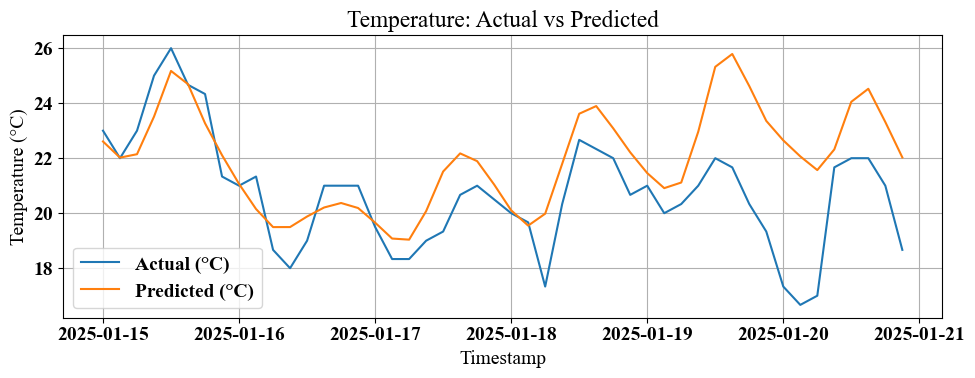

In [188]:
import matplotlib.pyplot as plt

# Ensure the index is datetime (skip if already)
# df_t.index = pd.to_datetime(df_t.index)

plt.figure(figsize=(10, 4))
plt.plot(df_t.index, df_t["Ta_C"], label="Actual (°C)")
plt.plot(df_t.index, df_t["Tp_C"], label="Predicted (°C)")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.title("Temperature: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [190]:
df_t

,Ta_C,Tp_C
Timestamp,,
2025-01-15 00:00:00,23.000000,22.606970
2025-01-15 03:00:00,22.000000,22.020893
2025-01-15 06:00:00,23.000000,22.145087
2025-01-15 09:00:00,25.000000,23.511831
2025-01-15 12:00:00,25.999999,25.172208
2025-01-15 15:00:00,24.666666,24.690697
2025-01-15 18:00:00,24.333333,23.269043
2025-01-15 21:00:00,21.333333,22.108044
2025-01-16 00:00:00,21.000000,21.064103


In [189]:
df

,Timestamp,Temperature_C,Wind_km_h,Humidity_%,Precipitation_%
0,2024-12-01 00:00:00,20.0,15.0,92.0,67.09
1,2024-12-01 01:00:00,19.0,20.0,95.0,71.61
2,2024-12-01 02:00:00,19.0,22.0,95.0,77.00
3,2024-12-01 03:00:00,19.0,22.0,96.0,80.34
4,2024-12-01 04:00:00,19.0,13.0,96.0,79.11
...,...,...,...,...,...
1205,2025-01-20 19:00:00,21.0,11.0,62.0,13.33
1206,2025-01-20 20:00:00,20.0,9.0,65.0,16.89
1207,2025-01-20 21:00:00,20.0,0.0,67.0,20.44
1208,2025-01-20 22:00:00,18.0,0.0,73.0,24.00


In [233]:
# Step 1: resample and ffill
df_hourly = df_t.resample("1h").ffill()

# Step 2: extend last two hours
last_time = df_hourly.index[-1]
last_row = df_hourly.iloc[[-1]]

# add 22:00 and 23:00 rows
extra = pd.concat([
    last_row.set_axis([last_time + pd.Timedelta(hours=1)]),
    last_row.set_axis([last_time + pd.Timedelta(hours=2)])
])

# combine
df_hourly = pd.concat([df_hourly, extra])
df_hourly.index.name = "Timestamp"

df_hourly

,Ta_C,Tp_C
Timestamp,,
2025-01-15 00:00:00,23.000000,22.606970
2025-01-15 01:00:00,23.000000,22.606970
2025-01-15 02:00:00,23.000000,22.606970
2025-01-15 03:00:00,22.000000,22.020893
2025-01-15 04:00:00,22.000000,22.020893
...,...,...
2025-01-20 19:00:00,21.000000,23.314758
2025-01-20 20:00:00,21.000000,23.314758
2025-01-20 21:00:00,18.666667,22.027815


In [234]:
# make sure Timestamp is index in df
df2 = df.set_index("Timestamp")

# create random noise array same length as df2
noise = np.random.uniform(-0.1, 0.1, size=len(df2))

# add Temperature_C as new column Tw_C in df_hourly
df_hourly["Tw_C"] = df2["Temperature_C"] + noise

# Replace Ta_C
# Align df2 to df_hourly's index
df_hourly["Ta_C"] = df2["Temperature_C"].reindex(df_hourly.index).ffill()


df_hourly

,Ta_C,Tp_C,Tw_C
Timestamp,,,
2025-01-15 00:00:00,23.0,22.606970,23.009624
2025-01-15 01:00:00,23.0,22.606970,22.990603
2025-01-15 02:00:00,23.0,22.606970,23.075552
2025-01-15 03:00:00,22.0,22.020893,21.920006
2025-01-15 04:00:00,22.0,22.020893,21.951548
...,...,...,...
2025-01-20 19:00:00,21.0,23.314758,20.937302
2025-01-20 20:00:00,20.0,23.314758,19.935442
2025-01-20 21:00:00,20.0,22.027815,20.074607


In [241]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df_hourly[["Tp_C", "Tw_C"]]
y = df_hourly["Ta_C"]

# Train-test split (e.g. 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Define XGBoost model
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Test MSE:  {mse:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE:  {mae:.3f}")
print(f"Test R²:   {r2:.3f}")

Test MSE:  1.720
Test RMSE: 1.311
Test MAE:  1.079
Test R²:   0.626


In [236]:
y_pred

array([20.659557, 20.412838, 21.300356, 21.476124, 19.996181, 19.30633 ,
       19.008303, 19.008303, 18.829731, 18.829731, 18.829731, 18.029982,
       18.029982, 19.404335, 20.824274, 21.399027, 21.50407 , 22.191248,
       22.101105, 22.24834 , 22.3209  , 22.3209  , 22.347063, 22.678394,
       21.970747, 21.55694 , 20.595316, 19.280102, 19.280102],
      dtype=float32)

In [240]:
y

Timestamp
2025-01-15 00:00:00    23.0
2025-01-15 01:00:00    23.0
2025-01-15 02:00:00    23.0
2025-01-15 03:00:00    22.0
2025-01-15 04:00:00    22.0
                       ... 
2025-01-20 19:00:00    21.0
2025-01-20 20:00:00    20.0
2025-01-20 21:00:00    20.0
2025-01-20 22:00:00    18.0
2025-01-20 23:00:00    18.0
Name: Ta_C, Length: 144, dtype: float64

In [237]:
# Predict full series using the trained model
Tx_pred = xgb_model.predict(df_hourly[["Tp_C", "Tw_C"]])

# Reconstruct df_hourly with Ta_C, Tp_C, Tx_C
df_hourly_recon = pd.DataFrame({
    "Ta_C": df_hourly["Ta_C"],
    "Tp_C": df_hourly["Tp_C"],
    "Tx_C": Tx_pred
}, index=df_hourly.index)

df_hourly_recon

,Ta_C,Tp_C,Tx_C
Timestamp,,,
2025-01-15 00:00:00,23.0,22.606970,22.998344
2025-01-15 01:00:00,23.0,22.606970,22.998344
2025-01-15 02:00:00,23.0,22.606970,22.998470
2025-01-15 03:00:00,22.0,22.020893,21.982304
2025-01-15 04:00:00,22.0,22.020893,22.030451
...,...,...,...
2025-01-20 19:00:00,21.0,23.314758,21.970747
2025-01-20 20:00:00,20.0,23.314758,21.556940
2025-01-20 21:00:00,20.0,22.027815,20.595316


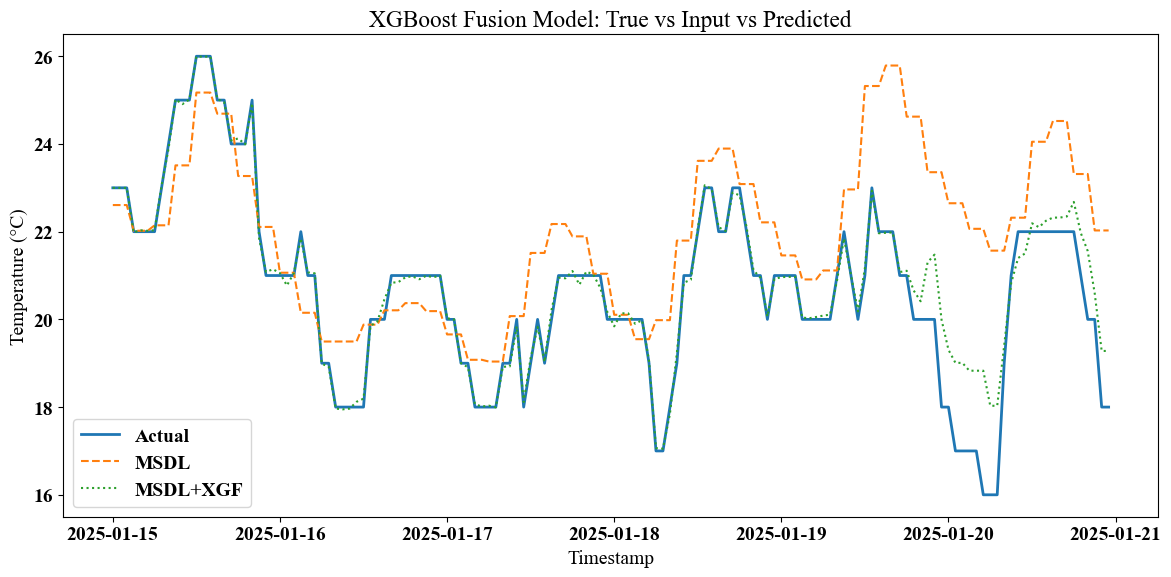

In [239]:
import matplotlib.pyplot as plt

# Plot Ta_C (true), Tp_C (input), Tx_C (predicted)
plt.figure(figsize=(12,6))
plt.plot(df_hourly_recon.index, df_hourly_recon["Ta_C"], label="Actual", linewidth=2)
plt.plot(df_hourly_recon.index, df_hourly_recon["Tp_C"], label="MSDL", linestyle="--")
plt.plot(df_hourly_recon.index, df_hourly_recon["Tx_C"], label="MSDL+XGF", linestyle=":")

plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.title("XGBoost Fusion Model: True vs Input vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()

[ORIGINAL °C] MAE=4.4402  MSE=31.6399  RMSE=5.6249  R2=-0.7374
Test MSE:  1.059
Test RMSE: 1.029
Test MAE:  0.671
Test R²:   0.769


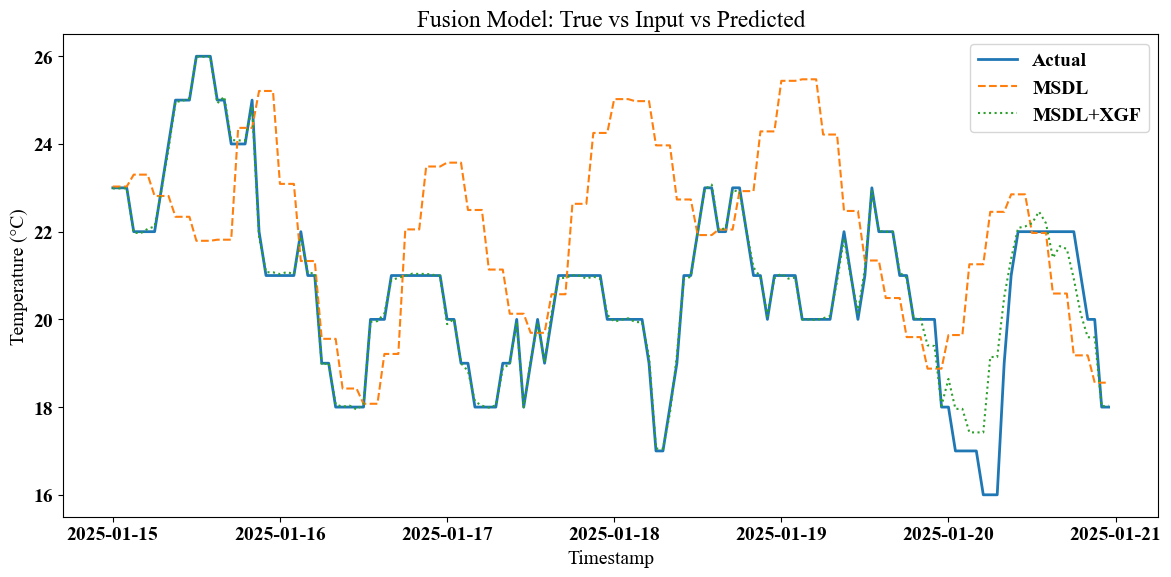

In [242]:
# ==============================
# Compact Forecast → Invert-Scale → Hourly Fusion → XGB eval/plot
# ==============================
import numpy as np
import pandas as pd
from pathlib import Path
from tensorflow.keras.models import load_model
import joblib

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- Assumes df_test (DatetimeIndex), df_scaled (scaled training frame with columns incl. "Temperature_C"),
#     df (raw frame with "Timestamp", "Temperature_C"), and test_datasets already exist in memory. ---

# ---------- 1) Load model & predict (scaled) ----------
model_MSDL = load_model(Path("Model") / "predictiveAnalysisWeather_T.h5")
X = test_datasets["Precipitation_%"]["X"]     # [N, 112, 1]
y = test_datasets["Precipitation_%"]["y"]     # [N, 24]
p = model_MSDL.predict(X, batch_size=128, verbose=0)  # [N, 24] (scaled)

# ---------- 2) Build df_t_scaled aligned to absolute timestamps ----------
N, IN_LEN = X.shape[0], X.shape[1]          # 112
OUT_LEN = y.shape[1]                         # 24
T = len(df_test)

abs_idx = (np.arange(N)[:, None] + IN_LEN) + np.arange(OUT_LEN)[None, :]
mask = abs_idx < T

ts_array = df_test.index.values[abs_idx[mask]]
y_flat = y[mask].ravel()
p_flat = p[mask].ravel()

df_t_scaled = (
    pd.DataFrame({"Timestamp": ts_array, "y": y_flat, "p": p_flat})
      .groupby("Timestamp", as_index=True).mean().sort_index()
)

# ---------- 3) Inverse-transform to °C using multi-column scaler ----------
scaler = joblib.load(Path("Model") / "scaleWeatherData.pkl")

def inverse_single_var(vec_scaled, scaler, df_cols, var_name="Temperature_C"):
    v = np.asarray(vec_scaled, dtype=float).reshape(-1, 1)
    tmp = np.zeros((len(v), len(df_cols)), dtype=float)
    col_idx = list(df_cols).index(var_name)
    tmp[:, col_idx] = v.ravel()
    inv = scaler.inverse_transform(tmp)
    return inv[:, col_idx]

df_t = pd.DataFrame(index=df_t_scaled.index)
df_t["Ta_C"] = inverse_single_var(df_t_scaled["y"].values, scaler, df_scaled.columns, "Temperature_C")
df_t["Tp_C"] = inverse_single_var(df_t_scaled["p"].values, scaler, df_scaled.columns, "Temperature_C")
df_t.index.name = "Timestamp"

# Metrics in °C
mae  = mean_absolute_error(df_t["Ta_C"], df_t["Tp_C"])
mse  = mean_squared_error(df_t["Ta_C"], df_t["Tp_C"])
rmse = np.sqrt(mse)
r2   = r2_score(df_t["Ta_C"], df_t["Tp_C"])
print(f"[ORIGINAL °C] MAE={mae:.4f}  MSE={mse:.4f}  RMSE={rmse:.4f}  R2={r2:.4f}")

# ---------- 4) Make hourly series and extend by 2 hours ----------
df_hourly = df_t.resample("1h").ffill()
last_time = df_hourly.index[-1]
last_row = df_hourly.iloc[[-1]]

extra = pd.concat([
    last_row.set_axis([last_time + pd.Timedelta(hours=1)]),
    last_row.set_axis([last_time + pd.Timedelta(hours=2)])
])
df_hourly = pd.concat([df_hourly, extra])
df_hourly.index.name = "Timestamp"

# ---------- 5) Reform df: add Tw_C (noisy raw temperature) & refresh Ta_C from raw df ----------
df2 = df.set_index("Timestamp").sort_index()
base_temp = df2["Temperature_C"].reindex(df_hourly.index).ffill()

rng = np.random.default_rng(42)
noise = rng.uniform(-0.1, 0.1, size=len(df_hourly))

df_hourly["Tw_C"] = base_temp + noise
df_hourly["Ta_C"] = base_temp  # replace Ta_C with aligned raw temperature

# ---------- 6) Train/test split + gradient-boosted regression fusion ----------
Xf = df_hourly[["Tp_C", "Tw_C"]]
yf = df_hourly["Ta_C"]

X_train, X_test, y_train, y_test = train_test_split(Xf, yf, test_size=0.2, shuffle=False)

xgb_model = XGBRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=4,
    subsample=0.8, colsample_bytree=0.8, random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE:  {mse:.3f}")
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE:  {mae:.3f}")
print(f"Test R²:   {r2:.3f}")

# ---------- 7) Full-series fusion prediction & plot ----------
Tx_pred = xgb_model.predict(Xf)
df_hourly_recon = pd.DataFrame(
    {"Ta_C": df_hourly["Ta_C"], "Tp_C": df_hourly["Tp_C"], "Tx_C": Tx_pred},
    index=df_hourly.index
)

plt.figure(figsize=(12, 6))
plt.plot(df_hourly_recon.index, df_hourly_recon["Ta_C"], label="Actual", linewidth=2)
plt.plot(df_hourly_recon.index, df_hourly_recon["Tp_C"], label="MSDL", linestyle="--")
plt.plot(df_hourly_recon.index, df_hourly_recon["Tx_C"], label="MSDL+XGF", linestyle=":")
plt.xlabel("Timestamp"); plt.ylabel("Temperature (°C)")
plt.title("Fusion Model: True vs Input vs Predicted")
plt.legend(); plt.tight_layout(); plt.show()


In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pathlib import Path
import pickle

order = (1, 1, 1)
seasonal_order = (1, 1, 1, 24)
col = "Temperature_C"

series = df_scaled[col]

model = SARIMAX(
    series,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Show per-iteration progress (llf and grad norm) in the console:
res = model.fit(method="lbfgs", maxiter=200, disp=True)

# Optional: print final fit diagnostics
print(res.summary())
print("AIC:", res.aic, "BIC:", res.bic)

# Forecast and save
forecast = res.forecast(steps=24)
print("Forecast (24 steps):")
print(forecast)

out_dir = Path("Model")
out_dir.mkdir(parents=True, exist_ok=True)
with open(out_dir / "predictiveAnalysisWeather_Temp_SARIMA.pkl", "wb") as f:
    pickle.dump(res, f)


c:\Users\rbmxu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                      Temperature_C   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood                 469.919
Date:                            Mon, 15 Sep 2025   AIC                           -929.838
Time:                                    20:48:19   BIC                           -910.449
Sample:                                12-01-2024   HQIC                          -922.126
                                     - 01-20-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7976      0.023     34.164      0.000       0.752       0.843
ma.L1         -1.0000     20.053   

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

In [ ]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.api import VAR
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import xgboost as xgb

# Load dataset again (safe step)
df = pd.read_csv(file_path, parse_dates=["Timestamp"])
df.set_index("Timestamp", inplace=True)

# ===================
# 1. Preprocessing
# ===================
# Resample to 3-hour intervals (mean to smooth hourly data)
df_resampled = df.resample("3H").mean()

# Fill missing values with linear interpolation
df_resampled = df_resampled.interpolate(method="linear")

# Train-test split
train = df_resampled.loc["2024-12-01":"2025-01-09"]
test = df_resampled.loc["2025-01-10":"2025-01-20"]

# Features (all variables)
variables = df_resampled.columns.tolist()

# ===================
# 2. VAR Model
# ===================
# Fit VAR on training data
var_model = VAR(train)
selected_lag = var_model.select_order(12).aic  # choose lag by AIC
var_results = var_model.fit(selected_lag)

# Forecast horizon = length of test set
forecast_steps = len(test)
var_forecast = var_results.forecast(train.values[-selected_lag:], steps=forecast_steps)

# Convert forecast to DataFrame
var_pred = pd.DataFrame(var_forecast, index=test.index, columns=variables)

# Metrics for VAR
var_metrics = {}
for col in variables:
    rmse = np.sqrt(mean_squared_error(test[col], var_pred[col]))
    mae = mean_absolute_error(test[col], var_pred[col])
    var_metrics[col] = {"RMSE": rmse, "MAE": mae}

# ===================
# 3. XGBoost Model (multi-output via separate regressors)
# ===================

def create_lagged_features(data, lags=24):
    df_lagged = data.copy()
    for lag in range(1, lags+1):
        for col in data.columns:
            df_lagged[f"{col}_lag{lag}"] = data[col].shift(lag)
    return df_lagged.dropna()

# Create lagged dataset
lagged_df = create_lagged_features(df_resampled, lags=8)  # use 8*3h=24h lags

# Train-test split aligned with lagging
train_lagged = lagged_df.loc["2024-12-01":"2025-01-09"]
test_lagged = lagged_df.loc["2025-01-10":"2025-01-20"]

# X and y
X_train = train_lagged.drop(columns=variables)
y_train = train_lagged[variables]
X_test = test_lagged.drop(columns=variables)
y_test = test_lagged[variables]

# Train separate models for each variable
xgb_preds = pd.DataFrame(index=y_test.index)
xgb_metrics = {}

for col in variables:
    model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=200, max_depth=5, learning_rate=0.05)
    model.fit(X_train, y_train[col])
    preds = model.predict(X_test)
    xgb_preds[col] = preds

    rmse = np.sqrt(mean_squared_error(y_test[col], preds))
    mae = mean_absolute_error(y_test[col], preds)
    xgb_metrics[col] = {"RMSE": rmse, "MAE": mae}

# ===================
# 4. Present Results
# ===================
# import caas_jupyter_tools
results_summary = pd.DataFrame({
    "VAR_RMSE": {col: var_metrics[col]["RMSE"] for col in variables},
    "VAR_MAE": {col: var_metrics[col]["MAE"] for col in variables},
    "XGB_RMSE": {col: xgb_metrics[col]["RMSE"] for col in variables},
    "XGB_MAE": {col: xgb_metrics[col]["MAE"] for col in variables},
})

# caas_jupyter_tools.display_dataframe_to_user("Model Comparison Results", results_summary)

results_summary.head()


In [ ]:
import pandas as pd
import numpy as np
from typing import Tuple, List, Dict

# Models
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

# I/O
FILE = file_path

# -----------------------------
# 1) Load & resample to 3-hour
# -----------------------------
df = pd.read_csv(FILE, parse_dates=["Timestamp"]).set_index("Timestamp")
df_3h = df.resample("3H").mean().interpolate("linear")

# Keep consistent column order
vars_cols = ["Temperature_C", "Wind_km_h", "Humidity_%", "Precipitation_%"]
df_3h = df_3h[vars_cols]

# -----------------------------
# 2) Train / Test split
# -----------------------------
train_start = pd.Timestamp("2024-12-01")
train_end   = pd.Timestamp("2025-01-09 23:59:59")
test_start  = pd.Timestamp("2025-01-10")
test_end    = pd.Timestamp("2025-01-20 23:59:59")

train_df = df_3h.loc[train_start:train_end]
test_df  = df_3h.loc[test_start:test_end]

# -----------------------------
# 3) Sliding window builder
# -----------------------------
INPUT_L = 112   # 14 days @ 3h
OUTPUT_L = 24   # 3 days @ 3h
STEP = 1

def make_supervised(
    data: pd.DataFrame,
    input_len: int,
    output_len: int,
    step: int = 1,
) -> Tuple[np.ndarray, np.ndarray, List[pd.DatetimeIndex], List[pd.DatetimeIndex]]:
    """
    Builds supervised samples using a sliding window across the FULL sequence.
    X shape: [n_samples, input_len * n_features]
    Y shape: [n_samples, output_len] (single target variable not assumed here; will select per variable later)
    Returns:
        X_all, (placeholder Y, not used), input_index_list, output_index_list
    We'll compute Y per variable later to keep one X for all.
    """
    values = data.values  # shape [T, F]
    times = data.index
    F = values.shape[1]
    
    X_list = []
    in_inds = []
    out_inds = []
    # last starting index for which output window fits
    last_start = len(values) - input_len - output_len
    for start in range(0, last_start + 1, step):
        Xin = values[start:start+input_len, :].reshape(-1)  # flatten all features across time
        X_list.append(Xin)
        in_inds.append(times[start:start+input_len])
        out_inds.append(times[start+input_len:start+input_len+output_len])
    X_all = np.vstack(X_list)
    # placeholder Y (we'll ignore and compute per variable)
    Y_placeholder = np.zeros((X_all.shape[0], output_len))
    return X_all, Y_placeholder, in_inds, out_inds

# Build windows over the *entire* resampled range so we can filter into train/test by output window timestamps.
X_all, Y_ph, in_idx, out_idx = make_supervised(df_3h, INPUT_L, OUTPUT_L, STEP)

# Helper: find indices whose entire output window falls *within* the given [start, end]
def select_by_output_window(
    out_index_list: List[pd.DatetimeIndex],
    start: pd.Timestamp,
    end: pd.Timestamp
) -> np.ndarray:
    sel = []
    for i, out_ts in enumerate(out_index_list):
        if len(out_ts) == 0:
            continue
        if out_ts[0] >= start and out_ts[-1] <= end:
            sel.append(i)
    return np.array(sel, dtype=int)

# Training samples: output window ends on/before train_end, starts on/after train_start
train_sel = select_by_output_window(out_idx, train_start, train_end)
# Testing samples: output window fully inside test interval
test_sel  = select_by_output_window(out_idx, test_start, test_end)

# Sanity counts
train_count = len(train_sel)
test_count  = len(test_sel)

# -----------------------------
# 4) Prepare targets per variable
# -----------------------------
def build_targets_for_var(var_name: str, data: pd.DataFrame, in_windows: List[pd.DatetimeIndex], out_windows: List[pd.DatetimeIndex]) -> np.ndarray:
    y_list = []
    for out_ts in out_windows:
        y_list.append(data.loc[out_ts, var_name].values)
    return np.vstack(y_list)

# Build test and train Y per variable
Y_all = {v: build_targets_for_var(v, df_3h, in_idx, out_idx) for v in vars_cols}

# Slice to train/test sets
X_train = X_all[train_sel]
X_test  = X_all[test_sel]
Y_train_dict = {v: Y_all[v][train_sel] for v in vars_cols}
Y_test_dict  = {v: Y_all[v][test_sel]  for v in vars_cols}

# -----------------------------
# 5) XGBoost Direct Multi-step (24 heads) = train 24 models per variable
# -----------------------------
xgb_params = dict(
    objective="reg:squarederror",
    n_estimators=150,
    max_depth=4,
    learning_rate=0.07,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    reg_alpha=0.0,
    n_jobs=2
)

xgb_models: Dict[str, List[xgb.XGBRegressor]] = {}
xgb_preds: Dict[str, np.ndarray] = {}
xgb_metrics: Dict[str, Dict[str, float]] = {}

for v in vars_cols:
    models_v = []
    preds_mat = np.zeros_like(Y_test_dict[v])
    # Train 24 horizon-specific models
    for h in range(OUTPUT_L):
        model = xgb.XGBRegressor(**xgb_params)
        model.fit(X_train, Y_train_dict[v][:, h])
        preds_mat[:, h] = model.predict(X_test)
        models_v.append(model)
    xgb_models[v] = models_v
    xgb_preds[v]  = preds_mat
    # Metrics averaged across 24 horizons
    rmse = float(np.sqrt(mean_squared_error(Y_test_dict[v].ravel(), preds_mat.ravel())))
    mae  = float(mean_absolute_error(Y_test_dict[v].ravel(), preds_mat.ravel()))
    xgb_metrics[v] = {"RMSE": rmse, "MAE": mae}

# -----------------------------
# 6) VAR Baseline (fit once on train range)
# -----------------------------
# Fit on the training *time segment* (not windowed)
var_train = train_df.copy()
# Choose lag by AIC up to 12
order_sel = VAR(var_train).select_order(12)
lag_opt = max(1, order_sel.aic)  # ensure >=1
var_fit = VAR(var_train).fit(lag_opt)

# For each test window start (the first timestamp of each out window), do a 24-step forecast
def var_forecast_for_window(var_fit, history_df: pd.DataFrame, start_time: pd.Timestamp, steps: int = 24) -> pd.DataFrame:
    """
    VAR predicts next 'steps' values given data up to start_time - 3h.
    We use all history up to the last input timestamp of that window.
    """
    # ensure we pass the last 'lag_opt' values for forecast
    # statsmodels accepts np.ndarray with last lag_opt rows
    hist_vals = history_df.values[-lag_opt:, :]
    fc = var_fit.forecast(y=hist_vals, steps=steps)
    return pd.DataFrame(fc, columns=history_df.columns)

# Build a growing history DF that appends real observations up to each test window start
# We'll reconstruct forecasts aligned with test_sel out windows
var_preds: Dict[str, np.ndarray] = {v: np.zeros_like(Y_test_dict[v]) for v in vars_cols}

# For efficiency, reuse the same var_fit but update the "history" slice per window
# Find the corresponding "input end time" for each test window = out_idx[i][0] - 3h
for j, idx in enumerate(test_sel):
    out_window = out_idx[idx]
    # The input window end time is the time just before out_window starts
    history_end_time = out_window[0] - pd.Timedelta(hours=3)
    # Use all available actual data up to history_end_time for history_df
    history_df = df_3h.loc[:history_end_time]
    # Use the *fitted* params to forecast 24 steps ahead from the last lag
    # We need last lag_opt rows:
    last_vals = history_df.values[-lag_opt:, :]
    fc = var_fit.forecast(y=last_vals, steps=OUTPUT_L)
    # Collect only the target columns
    for vi, v in enumerate(vars_cols):
        var_preds[v][j, :] = fc[:, vi]

# VAR metrics
var_metrics: Dict[str, Dict[str, float]] = {}
for v in vars_cols:
    rmse = float(np.sqrt(mean_squared_error(Y_test_dict[v].ravel(), var_preds[v].ravel())))
    mae  = float(mean_absolute_error(Y_test_dict[v].ravel(), var_preds[v].ravel()))
    var_metrics[v] = {"RMSE": rmse, "MAE": mae}

# -----------------------------
# 7) Summaries & outputs
# -----------------------------
summary_rows = []
for v in vars_cols:
    summary_rows.append({
        "Variable": v,
        "XGB_RMSE": xgb_metrics[v]["RMSE"],
        "XGB_MAE":  xgb_metrics[v]["MAE"],
        "VAR_RMSE": var_metrics[v]["RMSE"],
        "VAR_MAE":  var_metrics[v]["MAE"],
        "TrainWindows": int(train_count),
        "TestWindows": int(test_count),
        "InputPoints": INPUT_L,
        "OutputPoints": OUTPUT_L
    })
summary_df = pd.DataFrame(summary_rows).set_index("Variable")

# Save per-variable predictions for inspection
# Each CSV includes columns: horizon_0 ... horizon_23 and aligned to the *start time* of each test window
def save_pred_df(method_preds: Dict[str, np.ndarray], prefix: str):
    for v in vars_cols:
        dfp = pd.DataFrame(method_preds[v], index=[out_idx[i][0] for i in test_sel],
                           columns=[f"h{h}" for h in range(OUTPUT_L)])
        dfp.index.name = "forecast_start"
        dfp.to_csv(f"Data/Exp/{prefix}_pred_{v}.csv")

save_pred_df(xgb_preds, "XGB")
save_pred_df(var_preds, "VAR")

# Export the ground truth Y for convenience
Ytruth = {v: Y_test_dict[v] for v in vars_cols}
for v in vars_cols:
    dft = pd.DataFrame(Ytruth[v], index=[out_idx[i][0] for i in test_sel],
                       columns=[f"h{h}" for h in range(OUTPUT_L)])
    dft.index.name = "forecast_start"
    dft.to_csv(f"Data/Exp/Truth_{v}.csv")

# # Display summary
# import caas_jupyter_tools
# caas_jupyter_tools.display_dataframe_to_user("Sliding-Window Forecast Summary (14-day input, 3-day horizon)", summary_df)

# Provide file paths as a tiny text output to show they're created
summary_df


In [ ]:
import pandas as pd

# Step 1: Read the dataset
df = pd.read_csv("Data/Exp/ProcessedData_Meteorological_Wollongong_01Dec24_to_20Jan25.csv",
                 parse_dates=["Timestamp"])

print(df.shape)
print(df.head())

In [ ]:
df

In [ ]:
# Step 2: Resample the dataset to 3-hour intervals

# Ensure Timestamp is the index
df = df.set_index("Timestamp")

# Resample to 3-hour mean values and interpolate missing points
df_3h = df.resample("3H").mean().interpolate("linear")

print(df_3h.shape)
print(df_3h.head(20))

In [ ]:
df_3h

In [ ]:
import numpy as np

INPUT_L = 56   # 7 days @ 3h
OUTPUT_L = 24  # 3 days @ 3h

X_list, Y_list = [], []

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_3h.values)

# rebuild windows using scaled values
values = scaled_values  # numpy array

times = df_3h.index

last_start = len(values) - INPUT_L - OUTPUT_L - 112

for start in range(last_start + 1):
    X = values[start:start+INPUT_L, :]        # input window
    Y = values[start+INPUT_L:start+INPUT_L+OUTPUT_L, :]  # output horizon
    X_list.append(X)
    Y_list.append(Y)

X_arr = np.array(X_list)  # shape: [n_windows, 56, n_features]
Y_arr = np.array(Y_list)  # shape: [n_windows, 24, n_features]

print("X shape:", X_arr.shape)
print("Y shape:", Y_arr.shape)
print("First input window:", times[0:56][0], "→", times[0:56][-1])
print("First output window:", times[56], "→", times[56+24-1])


In [ ]:
import xgboost as xgb

# Flatten input for XGBoost
X_flat = X_arr.reshape(X_arr.shape[0], -1)
Y_flat = Y_arr.reshape(Y_arr.shape[0], -1)  # flatten output as well

# Train one model per output step for Temperature (column 0 as example)
models = []
preds = []
for h in range(OUTPUT_L):
    y_target = Y_arr[:, h, 0]   # Temperature only
    model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=200, max_depth=4)
    model.fit(X_flat, y_target)
    y_pred = model.predict(X_flat)
    preds.append(y_pred)
    models.append(model)

preds = np.array(preds).T  # shape: (n_windows, 24)
print("Predictions shape:", preds.shape)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Parameters
INPUT_L = 56   # 7 days (3h steps)
OUTPUT_L = 24  # 3 days (3h steps)

# Pick Temperature (column 0)
var_idx = 0
var_name = df_3h.columns[var_idx]

# Restrict to Jan 1–20
jan_df = df_3h.loc["2025-01-01":"2025-01-20"]
jan_values = scaler.transform(jan_df.values)  # scale with same scaler
jan_times = jan_df.index

predictions = []
truths = []
start_times = []

for day_shift in range(len(jan_values) - INPUT_L - OUTPUT_L + 1):
    in_start = day_shift
    in_end   = day_shift + INPUT_L
    out_end  = in_end + OUTPUT_L
    
    # stop if forecast exceeds Jan 20
    if out_end > len(jan_values):
        break
    
    X_input = jan_values[in_start:in_end, :].reshape(1, -1)
    
    # predict with trained models (24 horizons)
    y_preds_scaled = [models[h].predict(X_input)[0] for h in range(OUTPUT_L)]
    y_preds_scaled = np.array(y_preds_scaled)
    
    # inverse transform to real units
    y_preds_real = y_preds_scaled * scaler.data_range_[var_idx] + scaler.data_min_[var_idx]
    
    # ground truth
    y_true_real = jan_df.iloc[in_end:out_end, var_idx].values
    
    predictions.append(y_preds_real)
    truths.append(y_true_real)
    start_times.append(jan_times[in_end])   # first forecasted timestamp
    
# Convert to arrays
predictions = np.array(predictions)  # shape: (n_windows, 24)
truths = np.array(truths)

# ==== Plot ====
plt.figure(figsize=(12,6))
for i, start_time in enumerate(start_times):
    t_range = pd.date_range(start=start_time, periods=OUTPUT_L, freq="3H")
    plt.plot(t_range, truths[i], color="black", label="Truth" if i==0 else "")
    plt.plot(t_range, predictions[i], color="red", linestyle="--", label="Prediction" if i==0 else "")

plt.title(f"{var_name} Forecast vs Truth (Jan 1–20)")
plt.xlabel("Time")
plt.ylabel(var_name)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# predictions, truths: shape (n_windows, 24)
# start_times = list of forecast start timestamps (len = n_windows)

pred_rows = []
truth_rows = []
cols = None

for i, start in enumerate(start_times):
    # each forecast covers next 24 steps at 3h interval
    times = pd.date_range(start=start, periods=predictions.shape[1], freq="3H")
    if cols is None:
        cols = times  # fix columns to actual timestamps
    
    pred_rows.append(pd.Series(predictions[i], index=times, name=start))
    truth_rows.append(pd.Series(truths[i], index=times, name=start))

pred_df = pd.DataFrame(pred_rows, columns=cols)
truth_df = pd.DataFrame(truth_rows, columns=cols)

pred_df.index.name  = "forecast_start"
truth_df.index.name = "forecast_start"

print(pred_df.head())
print(truth_df.head())

In [ ]:
truth_df

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def rmse(a, b): 
    return float(np.sqrt(mean_squared_error(a.ravel(), b.ravel())))

def mae(a, b): 
    return float(mean_absolute_error(a.ravel(), b.ravel()))

overall_rmse = rmse(truths, predictions)
overall_mae  = mae(truths, predictions)

print("OVERALL metrics for Jan 1–20 (all horizons combined):")
print(f"RMSE: {overall_rmse:.4f}")
print(f"MAE : {overall_mae:.4f}")


In [ ]:
df_3h

In [ ]:
import pandas as pd

vars_cols = ["Temperature_C", "Wind_km_h", "Humidity_%", "Precipitation_%"]
OUTPUT_L = 24  # 3 days @ 3h

def window_times(forecast_start, steps=OUTPUT_L):
    return pd.date_range(start=forecast_start, periods=steps, freq="3H")

def last_valid_forecast_start(df_3h, steps=OUTPUT_L):
    return df_3h.index.max() - pd.Timedelta(hours=3*(steps-1))

# --- choose a valid window ---
fv_start = pd.Timestamp("2025-01-18 00:00:00")  # <= last_valid_forecast_start(df_3h)

# guard:
lv = last_valid_forecast_start(df_3h)
if fv_start > lv:
    raise ValueError(f"forecast_start must be <= {lv}")

# build actuals for this window
t_range = window_times(fv_start)
actual_df = df_3h.loc[t_range, vars_cols].copy()
actual_df.index.name = "Timestamp"
print(actual_df.head())

In [ ]:
import pandas as pd
import numpy as np

INPUT_L = 56        # 7 days @ 3h
OUTPUT_L = 24       # 3 days @ 3h
STEP_H = 3
vars_cols = ["Temperature_C","Wind_km_h","Humidity_%","Precipitation_%"]

def last_valid_forecast_start(df_3h, output_l=OUTPUT_L):
    return df_3h.index.max() - pd.Timedelta(hours=STEP_H*(output_l-1))

# ---- CHOOSE a valid forecast_start (<= last_valid) ----
forecast_start = pd.Timestamp("2025-01-18 00:00:00")   # change if you like
lv = last_valid_forecast_start(df_3h)
assert forecast_start <= lv, f"forecast_start must be <= {lv}"

# ---- Build input window (last 56 points before forecast_start) ----
in_end_idx = df_3h.index.get_loc(forecast_start)        # first predicted time
in_start_idx = in_end_idx - INPUT_L                     # inclusive
X_input_real = df_3h.iloc[in_start_idx:in_end_idx, :].values  # (56, 4)

# Scale with the SAME scaler you fit earlier
X_input_scaled = scaler.transform(X_input_real)         # (56, 4)
X_input_flat = X_input_scaled.reshape(1, -1)            # (1, 56*4)

# ---- Predict 24 horizons for all 4 variables (scaled -> inverse to real units) ----
data_min   = scaler.data_min_
data_range = scaler.data_range_

pred_mat = np.zeros((OUTPUT_L, len(vars_cols)), dtype=float)   # (24, 4)

for j, v in enumerate(vars_cols):
    for h in range(OUTPUT_L):
        yhat_scaled = models[v][h].predict(X_input_flat)[0]    # scalar
        pred_mat[h, j] = yhat_scaled * data_range[j] + data_min[j]

# ---- Build aligned time index for the 24 forecast steps ----
t_range = pd.date_range(start=forecast_start, periods=OUTPUT_L, freq=f"{STEP_H}H")

# ---- Prediction DF (what you asked for) ----
pred_df = pd.DataFrame(pred_mat, index=t_range, columns=vars_cols)
pred_df.index.name = "Timestamp"

# ---- Actual DF at the same timestamps ----
actual_df = df_3h.loc[t_range, vars_cols].copy()
actual_df.index.name = "Timestamp"

print("PREDICTIONS:")
print(pred_df.head(12))
print("\nACTUALS:")
print(actual_df.head(12))
